In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import librosa

In [4]:
import _functions

In [5]:
import joblib

In [75]:
test_case = 'Cui.wav'

In [76]:
signal, sample_rate = librosa.load(test_case, sr=None)

In [77]:
frames = _functions.frame_audio_signal(signal=signal)
mfcc_features = _functions.mfcc_features_extract(frames=frames, sample_rate=sample_rate, n_mfcc=20)
mfcc_features = _functions.filter_mfcc_features_by_frequency(
    mfcc_features=mfcc_features,
    threshold=5
)

In [78]:
len(frames)

394

In [79]:
X = pd.DataFrame(mfcc_features)

In [80]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-298.788910,123.336319,-18.476851,33.567013,6.320369,32.240738,-10.041006,4.044243,-6.755235,11.491487,-4.731282,-8.934370,-2.531830,-3.490434,3.411159,-9.279697,-0.616118,-7.903779,-1.194757,0.245596
1,-290.893860,121.529854,-19.117825,34.603554,9.298330,33.774715,-11.137529,2.157682,-7.645475,12.160187,-5.841869,-10.061379,-3.403390,-3.728832,3.603356,-9.855852,-1.363407,-8.561319,-1.262716,-0.707774
2,-284.961700,123.225021,-19.491825,35.238155,9.701522,35.646183,-13.252636,0.416236,-8.087195,13.649407,-6.627093,-10.516194,-4.603356,-4.227480,4.052565,-9.892624,-1.236090,-9.133907,-0.238242,-1.469603
3,-281.066925,124.187958,-18.954924,35.501328,11.165857,36.731941,-14.610173,-1.560311,-9.525025,13.452692,-7.523036,-10.139261,-3.880762,-3.811591,4.330548,-10.434061,-2.051611,-9.932382,0.260119,-1.740728
4,-277.823334,126.092316,-17.580479,36.328804,11.808541,38.056862,-15.070894,-1.796960,-10.007864,13.610717,-7.892466,-11.119875,-4.838026,-4.159308,4.281419,-10.730525,-1.896202,-10.129655,0.612626,-1.721496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,-417.454865,166.068390,-47.493416,52.944950,-35.853142,37.919483,-17.511522,31.616909,-6.842558,13.637963,10.627563,-2.972001,6.894312,-4.745499,2.661083,-7.684777,4.427783,-3.988073,0.024168,-3.452160
332,-415.716278,167.932968,-49.090107,54.456768,-37.054012,38.924580,-19.503185,32.150425,-8.109799,14.688873,10.128887,-2.019983,6.397440,-4.078905,2.595871,-8.480929,4.986908,-4.105056,0.786352,-3.288663
333,-413.817810,166.655350,-47.121628,54.362206,-36.293327,38.124607,-19.926395,32.551922,-8.741309,15.710842,8.839460,-1.465755,4.925076,-3.789055,2.707587,-7.875112,4.678326,-4.903718,0.468039,-4.266255
334,-413.482910,166.909805,-47.143272,55.412483,-36.337742,39.422798,-19.369785,33.573715,-10.306802,15.848177,6.695860,-0.762198,4.377656,-2.912509,2.365132,-8.519761,4.967990,-4.401357,1.684498,-4.198809


In [100]:
model_knn = joblib.load('model_KNN.joblib')
model_rf  = joblib.load('randomForestModel.joblib')

In [101]:
Y_pred2 = model_knn.predict(X)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [82]:
Y_pred = model_rf.predict(X)

c:\Users\tranh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [83]:
Y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [84]:
label_encoder = joblib.load('label_encoder.joblib')

In [91]:
emotion = {
    'happy' : 0,
    'sad' : 0,
    'surprise' : 0,
    'angry' : 0,
    'fear' : 0,
    'disgust' : 0,
    'neutral' : 0
}

In [85]:
print(emotion['angry'])

22


In [86]:
result = label_encoder.inverse_transform(Y_pred.argmax(axis=1))

In [87]:
vote, count = np.unique(result, return_counts=True)

In [92]:
for i in range(len(vote)):
    emotion[vote[i]] = count[i]

In [93]:
print(emotion)

{'happy': 0, 'sad': 0, 'surprise': 0, 'angry': 336, 'fear': 0, 'disgust': 0, 'neutral': 0}


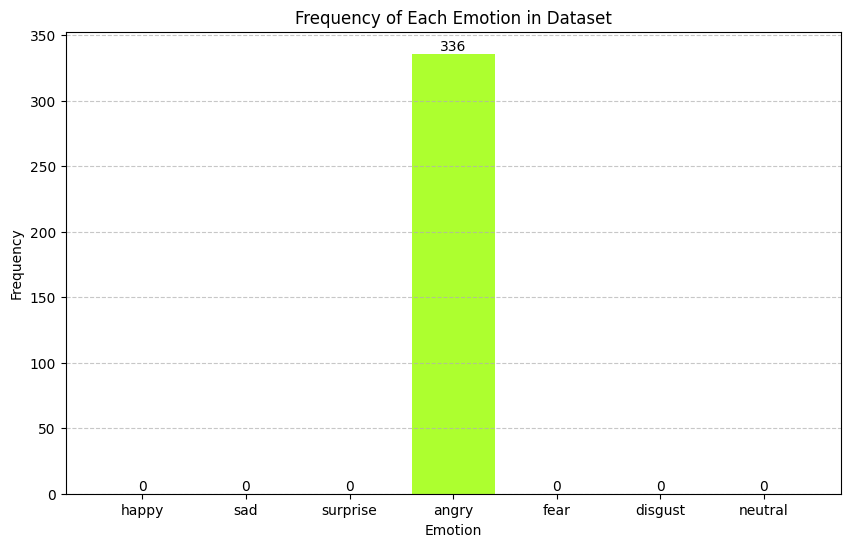

In [98]:
labels = list(emotion.keys())
values = list(emotion.values())
# Define a list of colors, one for each bar
colors = ['#FF6347', '#4682B4', '#FFD700', '#ADFF2F', '#FF69B4', '#8A2BE2', '#00CED1']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Each Emotion in Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()